In [1]:
%pylab inline
from mpl_toolkits.mplot3d import Axes3D

Populating the interactive namespace from numpy and matplotlib


First we read all the images.

In [2]:
import os, re

knight_images = [(imread("knight_pics/knight_fighting_" + format(i, '03') + '.png'))**2.2 for i in range(253)]

Then all the light directions and intensities

/home/kyp/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


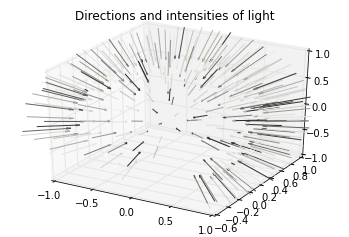

In [3]:
directions_text = []
with open("light_directions.txt") as f:
    directions_text = f.readlines()

D = []
for line in directions_text:
    match = re.match(r'[0-9]*\:\s*([\-0-9\.]*)\s*([\-0-9\.]*)\s*([\-0-9\.]*).*', line)
    D.append([float(match.group(1)),float(match.group(2)),float(match.group(3))])
D = array(D)

intensities_text = []
with open("light_intensities.txt") as f:
    intensities_text = f.readlines()

I = []
for line in intensities_text:
    match = re.match(r'[0-9]*\s+([0-9\.]*)\s*([0-9\.]*)\s*([0-9\.]*).*', line)
    I.append([float(match.group(1)),float(match.group(2)),float(match.group(3))])
I = array(I)

fig = figure()
ax = fig.add_subplot(111, projection='3d')
title("Directions and intensities of light")
ax.quiver(-D[:,0], -D[:,1], -D[:,2], D[:,0],D[:,1],D[:,2], length=.5, arrow_length_ratio=.1, color=I)    

We then use the same techniques as in the previous exercise

In [4]:
def colors_from_sphere(probe_image, D, I):
    light_colors = []
    for idx, d in enumerate(D):
        r = arccos(d[2])/(math.pi*sqrt(d[0]**2 + d[1]**2))
        UV = array([d[0]*r, d[1]*r])
        # convert to image_space
        UV = (UV + [1,1])*0.5*probe_image.shape[:2]
        light_colors.append(probe_image[UV[0]][UV[1]]*I[idx])
    return array(light_colors)

def light_frames(frames, light_colors):
    result = empty_like(frames[0])
    for idx, frame in enumerate(frames):
        res2 = result + frame*light_colors[idx]
        result = res2
    return result

In [5]:
import imageio

probe_image = imageio.imread("rnl_probe.hdr")
colors =  colors_from_sphere(probe_image, D, I)

/home/kyp/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [6]:
knight_image = light_frames(knight_images, colors)

And get a really nice render!

1.0


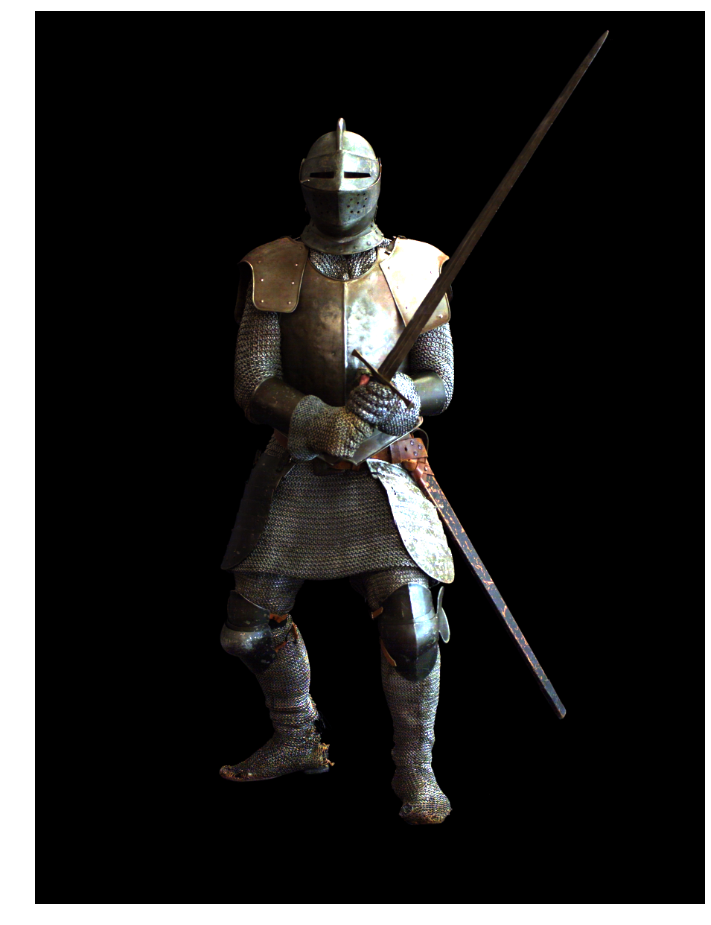

In [7]:
figure(figsize=(16,16))
axis('off')
imshow(clip(knight_image/5,0,1))
print knight_images[0].max()